In [35]:
import numpy as np 
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [36]:
IMAGE_SIZE = 224
classes = 2

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
!ls '/content/drive'

MyDrive


In [39]:
#Give dataset path
train_path = '/content/drive/MyDrive/vgg16/training'
test_path = '/content/drive/MyDrive/vgg16/testing'

In [40]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
          '/content/drive/MyDrive/vgg16/training',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 476 images belonging to 2 classes.


In [41]:
class_name = list(train_generator.class_indices.keys())
class_name

['mobil', 'motor']

In [42]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range= 5,
        width_shift_range= 0.1,
        height_shift_range= 0.1, 
        horizontal_flip= True,
        fill_mode= "nearest")

test_generator = test_datagen.flow_from_directory(
          '/content/drive/MyDrive/vgg16/testing',
        target_size= (IMAGE_SIZE, IMAGE_SIZE), class_mode="sparse")

Found 16 images belonging to 2 classes.


In [43]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [44]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [45]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [47]:
train_data = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 476 images belonging to 2 classes.


In [48]:
test_data = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 16 images belonging to 2 classes.


In [49]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=train_data, validation_data= test_data, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

<ipython-input-49-085a1c0ca4f3>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=10,generator=train_data, validation_data= test_data, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.7776 - accuracy: 0.5095  

10/10 [==============================] - 799s 80s/step - loss: 0.7776 - accuracy: 0.5095 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.5222  

10/10 [==============================] - 773s 77s/step - loss: 0.6946 - accuracy: 0.5222
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.5222  

10/10 [==============================] - 758s 76s/step - loss: 0.6959 - accuracy: 0.5222
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.4656  

10/10 [==============================] - 764s 76s/step - loss: 0.6943 - accuracy: 0.4656
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.4684  

10/10 [==============================] - 759s 76s/step - loss: 0.6945 - accuracy: 0.4684
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5253  

10/10 [==============================] - 779s 79s/step - loss: 0.6924 - accuracy: 0.5253
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5063  

10/10 [==============================] - 770s 77s/step - loss: 0.6935 - accuracy: 0.5063
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5348  

10/10 [==============================] - 761s 76s/step - loss: 0.6924 - accuracy: 0.5348
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5190  

10/10 [==============================] - 758s 75s/step - loss: 0.6929 - accuracy: 0.5190
Epoch 10/10
10/10 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5285  

10/10 [==============================] - 729s 73s/step - loss: 0.6921 - accuracy: 0.5285


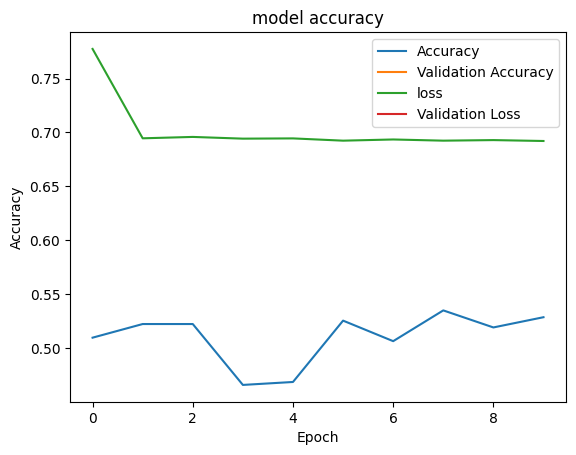

In [50]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [53]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 1s 1s/step


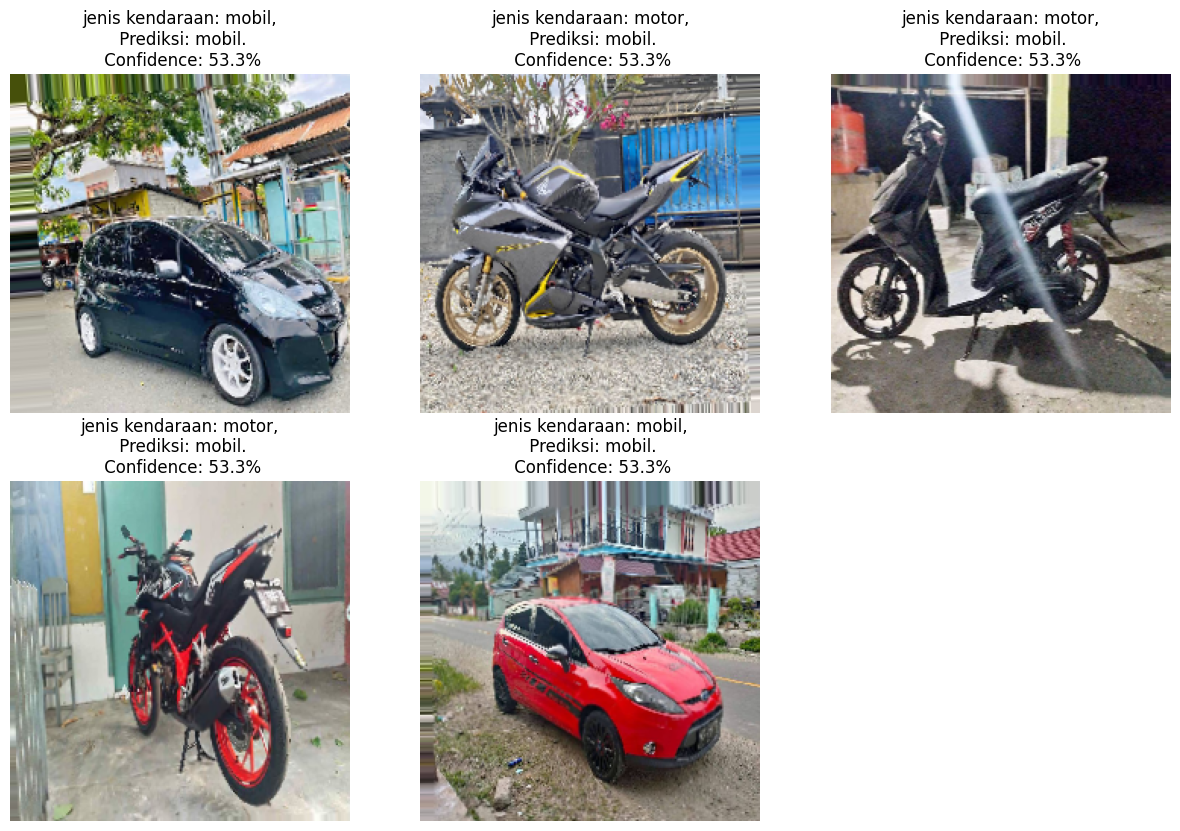

In [54]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"jenis kendaraan: {actual_class},\n Prediksi: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break